# Length Analysis (Mandarin)
This notebook performs length analysis on both phones and words in the English dataset. It extracts the duration of each phone/word token from the associated annotation file (done in alignment extract), filters out invalid tokens, and calculates the length statistics (mean, standard deviation, maximum, minimum, and histogram) of the valid tokens. The analysis provides insights into the distribution of phone/word lengths in the dataset and helps understand the characteristics of the dataset.

In [12]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson
import pickle
from paths import *
from ssd_paths import *
from mio import *
from sampler import *
from misc_soundtype_judge import PINYIN, SAMPA

## Phones


In [13]:
# Create an empty numpy array to store durations
total_durations = np.empty((0, ), dtype=float)


# Iterate through all csv files in phones_extract_path
for file_name in os.listdir(as_phones_extract_path): 
    # Check if the file ends with '.csv'
    if file_name.endswith('.csv'): 
        df = pd.read_csv(os.path.join(as_phones_extract_path, file_name))
        # Mandarin only has SIL, so we can just filter it out
        filtered_df = df[df['token'] != "[SIL]"]
        # Filter out rows where duration is equal to 0
        filtered_df = filtered_df[filtered_df['duration'] >= 0.0125]
        # Get the durations
        durations = filtered_df['duration'].to_numpy()
        # Concatenate the durations to the total_durations array
        total_durations = np.concatenate((total_durations, durations), axis=0)

In [14]:
total_durations.shape
# this is around half of the total number of durations in the corpus. Not bad

(351512,)

Mean duration: 0.12
Median duration: 0.11
Standard deviation of duration: 0.06
Minimum duration: 0.02
Maximum duration: 1.28


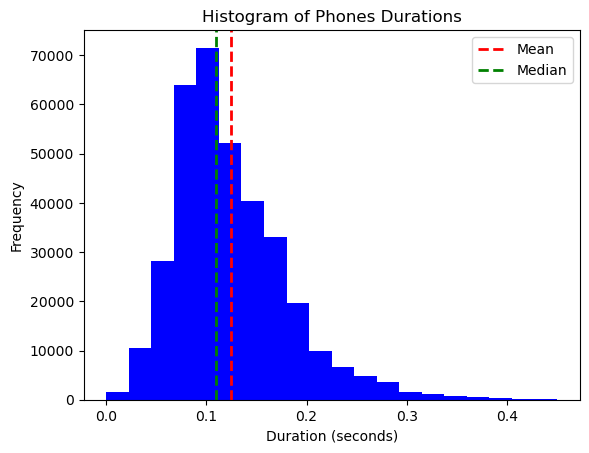

In [15]:
# Calculate some basic statistics on the durations
mean_duration = np.mean(total_durations)
median_duration = np.median(total_durations)
std_duration = np.std(total_durations)
min_duration = np.min(total_durations)
max_duration = np.max(total_durations)

# Print the statistics
print("Mean duration: {:.2f}".format(mean_duration))
print("Median duration: {:.2f}".format(median_duration))
print("Standard deviation of duration: {:.2f}".format(std_duration))
print("Minimum duration: {:.2f}".format(min_duration))
print("Maximum duration: {:.2f}".format(max_duration))

# Plot a histogram of the durations
plt.hist(total_durations, bins=20, color='blue', range=(0,0.45))
plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_duration, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.title("Histogram of Phones Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

In [16]:
# Fit a gamma distribution to the data
shape, loc, scale = gamma.fit(total_durations, floc=0)

# Generate a sample of durations from the fitted distribution
sample = gamma.rvs(shape, loc=loc, scale=scale, size=1000)

# Compute the mean and standard deviation of the sample
mean = np.mean(sample)
std_dev = np.std(sample)

# Print the results
print(f"Fitted shape parameter: {shape}")
print(f"Fitted scale parameter: {scale}")
print(f"Sample mean: {mean}")
print(f"Sample standard deviation: {std_dev}")


Fitted shape parameter: 4.92847892659349
Fitted scale parameter: 0.025296511839940642
Sample mean: 0.12384501928845586
Sample standard deviation: 0.05753991286052399


In [10]:
save_gamma_params(shape, loc, scale, path='phones_length_gamma_man.param')

## Check English and Mandarin recording consonant lengths

In [6]:
# Create an empty numpy array to store durations
total_durations_man = np.empty((0, ), dtype=float)
# Iterate through all csv files in phones_extract_path
for file_name in os.listdir(as_phones_extract_path): 
    # Check if the file ends with '.csv'
    if file_name.endswith('.csv'): 
        df = pd.read_csv(os.path.join(as_phones_extract_path, file_name))
        # Mandarin only has SIL, so we can just filter it out
        filtered_df = df[df['token'] != "[SIL]"]
        # Filter out rows where duration is equal to 0
        filtered_df = filtered_df[filtered_df['duration'] >= 0.0125]

        filtered_df['category'] = filtered_df['token'].apply(PINYIN.vowel_consonant)
        filtered_df = filtered_df[filtered_df['category'] == 'consonant']
        # Get the durations
        durations = filtered_df['duration'].to_numpy()
        # Concatenate the durations to the total_durations array
        total_durations_man = np.concatenate((total_durations_man, durations), axis=0)

In [7]:
# Create an empty numpy array to store durations
total_durations_eng = np.empty((0, ), dtype=float)
# Iterate through all csv files in phones_extract_path
for file_name in os.listdir(phones_extract_path): 
    # Check if the file ends with '.csv'
    if file_name.endswith('.csv'): 
        df = pd.read_csv(os.path.join(phones_extract_path, file_name))
        # Mandarin only has SIL, so we can just filter it out
        filtered_df = df[~(df['token'].str.contains('<|>') | (df['token'] == df['token'].str.upper()))]
        # Filter out rows where duration is equal to 0
        filtered_df = filtered_df[filtered_df['duration'] >= 0.0125]

        filtered_df['category'] = filtered_df['token'].apply(SAMPA.vowel_consonant)
        filtered_df = filtered_df[filtered_df['category'] == 'consonant']
        # Get the durations
        durations = filtered_df['duration'].to_numpy()
        # Concatenate the durations to the total_durations array
        total_durations_eng = np.concatenate((total_durations_eng, durations), axis=0)

In [8]:
total_durations_man.shape, total_durations_eng.shape

((160711,), (470654,))

In [9]:
def draw_this(total_durations): 
    # Calculate some basic statistics on the durations
    mean_duration = np.mean(total_durations)
    median_duration = np.median(total_durations)
    std_duration = np.std(total_durations)
    min_duration = np.min(total_durations)
    max_duration = np.max(total_durations)

    # Print the statistics
    print("Mean duration: {:.2f}".format(mean_duration))
    print("Median duration: {:.2f}".format(median_duration))
    print("Standard deviation of duration: {:.2f}".format(std_duration))
    print("Minimum duration: {:.2f}".format(min_duration))
    print("Maximum duration: {:.2f}".format(max_duration))

    # Plot a histogram of the durations
    plt.hist(total_durations, bins=20, color='blue', range=(0,0.45))
    plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median_duration, color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.legend()
    plt.title("Histogram of Phones Durations")
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Frequency")
    plt.show()

Mean duration: 0.07
Median duration: 0.06
Standard deviation of duration: 0.05
Minimum duration: 0.01
Maximum duration: 16.26


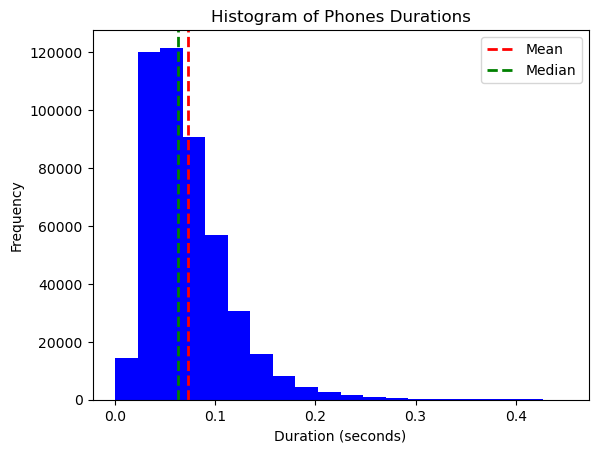

In [10]:
draw_this(total_durations_eng)

Mean duration: 0.13
Median duration: 0.12
Standard deviation of duration: 0.04
Minimum duration: 0.02
Maximum duration: 0.72


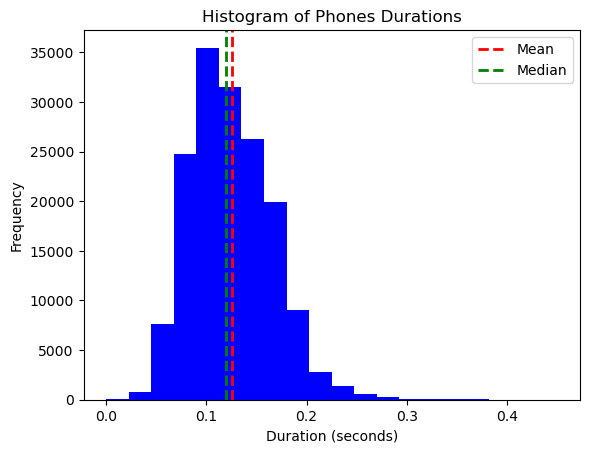

In [11]:
draw_this(total_durations_man)

I suspect that the average length of Mandarin words is not very different from English words, but this is mainly because Mandarin includes the rhyme as a whole. So we just take English. 

NO! Above is wrong. 

Mandarin consonants are also longer. Probably because Man cons is always onset and singleton. 

Based on this we take the real Man, instead of Eng. 


## Conclusion
Despite one distribution being real and the other being fitted and sampled, there is not much difference between the two. Additionally, the fit-and-sample distribution has fewer extreme outliers. 

Let's stick to the sampled one. 

The following code prepares a reusable poisson distribution

In [16]:
# generate_sounds_per_word_sample("words_length_gamma.param", "phones_length_gamma.param", poisson_size=100000)